# Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split




# Loading the JSON data File

In [10]:
# Read JSON File method
def get_json_data(file_name):
    """
    Read json data file and return list
    """
    with open(file_name) as f:
        data = json.load(f)
    return data["usedCars"]

In [4]:
j_list = get_json_data("usedCars.json")
Cars = pd.json_normalize(j_list)

In [5]:
pd.set_option("display.max_columns", None)


# Exploratory Data Analysis

We start by dropping the rows that are irrelevant. Have made a list of such rows, and dropped them using the .drop function of
Pandas library. 

In [6]:
rows_drop = ["image","keywords","sellerLocation","postedFrom","brand.@type","vehicleEngine.@type","extraFeatures.AdRef#", "extraFeatures.AuctionGrade","extraFeatures.ChassisNo.","extraFeatures.ImportDate","extraFeatures.BatteryCapacity","extraFeatures.Warranty","extraFeatures","name","description","brand.name","extraFeatures.EngineCapacity","extraFeatures.BodyType","extraFeatures.LastUpdated:"]

Cars.drop(rows_drop,axis = 1,inplace  =True)


##### Column titles are Capitalized to make them unique and consistent across the Dataframe

In [7]:
Cars.columns = Cars.columns.str.capitalize()


In [8]:
Cars.columns = ["Type","Model","Condition","Model Date", "Manufacturer","Fuel Type"," Vehicle Transmission","Color","Body Type","Mileage","Features","Ad Last Updated","Price","Price Currency","Vehicle Engine","Registered","Color","Assembled"]
Cars.head(5)

,Type,Model,Condition,Model Date,Manufacturer,Fuel Type,Vehicle Transmission,Color,Body Type,Mileage,Features,Ad Last Updated,Price,Price Currency,Vehicle Engine,Registered,Color,Assembled
0,Car,Mehran,used,2013,Suzuki,Petrol,Manual,White,Hatchback,"42,000 km","[AM/FM Radio, Alloy Rims, Cassette Player, Imm...","Aug 27, 2021",790000,PKR,800cc,Islamabad,White,Local
1,Car,Pajero,used,1992,Mitsubishi,Petrol,Automatic,Silver,SUV,"82,400 km","[AM/FM Radio, Air Bags, Air Conditioning, Allo...","Aug 27, 2021",2000000,PKR,3500cc,Karachi,Silver,Imported
2,Car,Cultus,used,2016,Suzuki,Petrol,Manual,Grey,Hatchback,"123,456 km","[AM/FM Radio, Air Conditioning, Alloy Rims, CD...","Aug 27, 2021",1265000,PKR,1000cc,Lahore,Grey,Local
3,Car,Corolla,used,2007,Toyota,Petrol,Automatic,White,NaN,"71,000 km","[ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Aug 27, 2021",3500000,PKR,1800cc,Un-Registered,White,Imported
4,Car,City,used,2013,Honda,Petrol,Manual,Grey,Sedan,11 km,"[ABS, AM/FM Radio, Air Conditioning, Alloy Rim...","Aug 27, 2021",2075000,PKR,1500cc,Lahore,Grey,Local


##### Checking the datatypes of the variables. Since, there are only 2 integer variables, we need to convert some string variables into integers

In [12]:
Cars.dtypes.value_counts() 

object    16
int64      2
dtype: int64

##### Cleaning Vehicle Engine and Mileage variable

In [13]:
Cars["Vehicle Engine"] =  Cars["Vehicle Engine"].squeeze().str.replace("cc","")


In [14]:
Cars["Mileage"] = Cars["Mileage"].squeeze().str.replace(" km","")

In [15]:
Cars.rename(columns={"Mileage":"Mileage_km", "Vehicle Engine": "Vehicle Engine_cc", " Vehicle Transmission": "Vehicle Transmission"}, inplace = True)



###### Converting few string variables into integers

In [16]:
Cars["Mileage_km"] = Cars["Mileage_km"].squeeze().str.replace(",","") 
Cars["Mileage_km"] = pd.to_numeric(Cars["Mileage_km"].squeeze())

Cars["Vehicle Engine_cc"] = pd.to_numeric(Cars["Vehicle Engine_cc"].squeeze())

Cars["Ad Last Updated"] = pd.to_datetime(Cars["Ad Last Updated"].squeeze())


In [17]:
Cars

,Type,Model,Condition,Model Date,Manufacturer,Fuel Type,Vehicle Transmission,Color,Body Type,Mileage_km,Features,Ad Last Updated,Price,Price Currency,Vehicle Engine_cc,Registered,Color,Assembled
0,Car,Mehran,used,2013,Suzuki,Petrol,Manual,White,Hatchback,42000,"[AM/FM Radio, Alloy Rims, Cassette Player, Imm...",2021-08-27,790000,PKR,800.0,Islamabad,White,Local
1,Car,Pajero,used,1992,Mitsubishi,Petrol,Automatic,Silver,SUV,82400,"[AM/FM Radio, Air Bags, Air Conditioning, Allo...",2021-08-27,2000000,PKR,3500.0,Karachi,Silver,Imported
2,Car,Cultus,used,2016,Suzuki,Petrol,Manual,Grey,Hatchback,123456,"[AM/FM Radio, Air Conditioning, Alloy Rims, CD...",2021-08-27,1265000,PKR,1000.0,Lahore,Grey,Local
3,Car,Corolla,used,2007,Toyota,Petrol,Automatic,White,NaN,71000,"[ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2021-08-27,3500000,PKR,1800.0,Un-Registered,White,Imported
4,Car,City,used,2013,Honda,Petrol,Manual,Grey,Sedan,11,"[ABS, AM/FM Radio, Air Conditioning, Alloy Rim...",2021-08-27,2075000,PKR,1500.0,Lahore,Grey,Local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55670,Car,Prius,used,2010,Toyota,Petrol,Automatic,White,Sedan,199000,"[ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2020-10-10,2700000,PKR,1800.0,Un-Registered,White,Imported
55671,Car,Sportage,used,2020,KIA,Petrol,Automatic,Black,SUV,180,"[ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2020-08-22,5900000,PKR,2000.0,Un-Registered,Black,Local
55672,Car,Vezel,used,2014,Honda,Petrol,Automatic,Silver,Crossover,62500,"[ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2020-08-08,3250000,PKR,1500.0,Karachi,Silver,Imported
55673,Car,Bolan,used,2019,Suzuki,Petrol,Manual,White,NaN,16300,[],2020-08-01,1170000,PKR,800.0,Islamabad,White,Local


In [18]:
Cars.dtypes.value_counts() 

object            13
int64              3
datetime64[ns]     1
float64            1
dtype: int64

In [19]:
Cars

,Type,Model,Condition,Model Date,Manufacturer,Fuel Type,Vehicle Transmission,Color,Body Type,Mileage_km,Features,Ad Last Updated,Price,Price Currency,Vehicle Engine_cc,Registered,Color,Assembled
0,Car,Mehran,used,2013,Suzuki,Petrol,Manual,White,Hatchback,42000,"[AM/FM Radio, Alloy Rims, Cassette Player, Imm...",2021-08-27,790000,PKR,800.0,Islamabad,White,Local
1,Car,Pajero,used,1992,Mitsubishi,Petrol,Automatic,Silver,SUV,82400,"[AM/FM Radio, Air Bags, Air Conditioning, Allo...",2021-08-27,2000000,PKR,3500.0,Karachi,Silver,Imported
2,Car,Cultus,used,2016,Suzuki,Petrol,Manual,Grey,Hatchback,123456,"[AM/FM Radio, Air Conditioning, Alloy Rims, CD...",2021-08-27,1265000,PKR,1000.0,Lahore,Grey,Local
3,Car,Corolla,used,2007,Toyota,Petrol,Automatic,White,NaN,71000,"[ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2021-08-27,3500000,PKR,1800.0,Un-Registered,White,Imported
4,Car,City,used,2013,Honda,Petrol,Manual,Grey,Sedan,11,"[ABS, AM/FM Radio, Air Conditioning, Alloy Rim...",2021-08-27,2075000,PKR,1500.0,Lahore,Grey,Local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55670,Car,Prius,used,2010,Toyota,Petrol,Automatic,White,Sedan,199000,"[ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2020-10-10,2700000,PKR,1800.0,Un-Registered,White,Imported
55671,Car,Sportage,used,2020,KIA,Petrol,Automatic,Black,SUV,180,"[ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2020-08-22,5900000,PKR,2000.0,Un-Registered,Black,Local
55672,Car,Vezel,used,2014,Honda,Petrol,Automatic,Silver,Crossover,62500,"[ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2020-08-08,3250000,PKR,1500.0,Karachi,Silver,Imported
55673,Car,Bolan,used,2019,Suzuki,Petrol,Manual,White,NaN,16300,[],2020-08-01,1170000,PKR,800.0,Islamabad,White,Local


Adding a column for the length of features for each observation (Car)

In [20]:
s = Cars["Features"].squeeze()

#Squeeze function turns df into series
#we can apply unique function now
#length_fe = len()
le = []
for i in s:
    le.append(len(i))
    
Cars["Length_features"] = le





Need to find the row with 28 features(max) and make it turn into 28 categorical columns

In [21]:
#So what we think could be a possible solution of turning features into categorical variables is first making 28 columns with 0s. 
# Later iterating each row and updating the the those categorical colums with 1 if that specific variable is found in the 
# observation. 

In [22]:
Cars

,Type,Model,Condition,Model Date,Manufacturer,Fuel Type,Vehicle Transmission,Color,Body Type,Mileage_km,Features,Ad Last Updated,Price,Price Currency,Vehicle Engine_cc,Registered,Color,Assembled,Length_features
0,Car,Mehran,used,2013,Suzuki,Petrol,Manual,White,Hatchback,42000,"[AM/FM Radio, Alloy Rims, Cassette Player, Imm...",2021-08-27,790000,PKR,800.0,Islamabad,White,Local,4
1,Car,Pajero,used,1992,Mitsubishi,Petrol,Automatic,Silver,SUV,82400,"[AM/FM Radio, Air Bags, Air Conditioning, Allo...",2021-08-27,2000000,PKR,3500.0,Karachi,Silver,Imported,11
2,Car,Cultus,used,2016,Suzuki,Petrol,Manual,Grey,Hatchback,123456,"[AM/FM Radio, Air Conditioning, Alloy Rims, CD...",2021-08-27,1265000,PKR,1000.0,Lahore,Grey,Local,4
3,Car,Corolla,used,2007,Toyota,Petrol,Automatic,White,NaN,71000,"[ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2021-08-27,3500000,PKR,1800.0,Un-Registered,White,Imported,13
4,Car,City,used,2013,Honda,Petrol,Manual,Grey,Sedan,11,"[ABS, AM/FM Radio, Air Conditioning, Alloy Rim...",2021-08-27,2075000,PKR,1500.0,Lahore,Grey,Local,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55670,Car,Prius,used,2010,Toyota,Petrol,Automatic,White,Sedan,199000,"[ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2020-10-10,2700000,PKR,1800.0,Un-Registered,White,Imported,14
55671,Car,Sportage,used,2020,KIA,Petrol,Automatic,Black,SUV,180,"[ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2020-08-22,5900000,PKR,2000.0,Un-Registered,Black,Local,14
55672,Car,Vezel,used,2014,Honda,Petrol,Automatic,Silver,Crossover,62500,"[ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2020-08-08,3250000,PKR,1500.0,Karachi,Silver,Imported,15
55673,Car,Bolan,used,2019,Suzuki,Petrol,Manual,White,NaN,16300,[],2020-08-01,1170000,PKR,800.0,Islamabad,White,Local,0


Making a new DataFrame of all features with one hot encoding and then combining it


In [23]:
l = Cars['Features'].squeeze()
liss = []
# print(len(l))
for i in range(len(l)):
  for j in range(len(l[i])):
    if (l[i][j] not in liss):
      liss.append(l[i][j])

In [24]:
lss=[]
for i in range(len(liss)):
  lss.append(0)

ll=[]
for i in range(len(Cars)):
  ll.append(lss)
df = pd.DataFrame(ll,columns =liss)
for i in range(len(Cars)):
  feat =  Cars['Features'][i]
  # print(feat)
  for j in feat:
    # print(j)
    if j in liss:
      df[j][i]=1
df

,AM/FM Radio,Alloy Rims,Cassette Player,Immobilizer Key,Air Bags,Air Conditioning,Keyless Entry,Power Locks,Power Mirrors,Power Steering,Power Windows,Sun Roof,CD Player,ABS,Cruise Control,DVD Player,Navigation System,Front Speakers,Rear Camera,Rear Speakers,CoolBox,Climate Control,Steering Switches,USB and Auxillary Cable,Rear AC Vents,Front Camera,Heated Seats,Rear Seat Entertainment
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55670,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
55671,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
55672,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
55673,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
resultant = pd.merge(Cars,df,left_index=True,right_index=True)
# resultant = resultant.rename(columns={'(Type,)': "Type", "(Model,)": "Model","(Condition,)": "Condition","(Model Date,)": "Model Date","(Manufacturer,)": "Manufacturer","(Fuel Type,)": "Fuel Type","(Vehicle Transmission,)": "Vehicle Transmission","(Color,)": "Color"})
resultant = resultant.drop(['Features'],axis=1)
resultant = resultant.dropna()
resultant


,Type,Model,Condition,Model Date,Manufacturer,Fuel Type,Vehicle Transmission,Color,Body Type,Mileage_km,Ad Last Updated,Price,Price Currency,Vehicle Engine_cc,Registered,Color,Assembled,Length_features,AM/FM Radio,Alloy Rims,Cassette Player,Immobilizer Key,Air Bags,Air Conditioning,Keyless Entry,Power Locks,Power Mirrors,Power Steering,Power Windows,Sun Roof,CD Player,ABS,Cruise Control,DVD Player,Navigation System,Front Speakers,Rear Camera,Rear Speakers,CoolBox,Climate Control,Steering Switches,USB and Auxillary Cable,Rear AC Vents,Front Camera,Heated Seats,Rear Seat Entertainment
0,Car,Mehran,used,2013,Suzuki,Petrol,Manual,White,Hatchback,42000,2021-08-27,790000,PKR,800.0,Islamabad,White,Local,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Car,Pajero,used,1992,Mitsubishi,Petrol,Automatic,Silver,SUV,82400,2021-08-27,2000000,PKR,3500.0,Karachi,Silver,Imported,11,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Car,Cultus,used,2016,Suzuki,Petrol,Manual,Grey,Hatchback,123456,2021-08-27,1265000,PKR,1000.0,Lahore,Grey,Local,4,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Car,City,used,2013,Honda,Petrol,Manual,Grey,Sedan,11,2021-08-27,2075000,PKR,1500.0,Lahore,Grey,Local,13,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
5,Car,Cultus,used,2016,Suzuki,Petrol,Manual,Grey,Hatchback,123456,2021-08-27,1295000,PKR,1000.0,Lahore,Grey,Local,4,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55669,Car,Bolan,used,2016,Suzuki,Petrol,Manual,White,Van,59500,2020-10-10,890000,PKR,800.0,Lahore,White,Local,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55670,Car,Prius,used,2010,Toyota,Petrol,Automatic,White,Sedan,199000,2020-10-10,2700000,PKR,1800.0,Un-Registered,White,Imported,14,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
55671,Car,Sportage,used,2020,KIA,Petrol,Automatic,Black,SUV,180,2020-08-22,5900000,PKR,2000.0,Un-Registered,Black,Local,14,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
55672,Car,Vezel,used,2014,Honda,Petrol,Automatic,Silver,Crossover,62500,2020-08-08,3250000,PKR,1500.0,Karachi,Silver,Imported,15,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0


# Time Series Analysis

In [26]:
dfts = resultant.copy(deep=False)
dfts

,Type,Model,Condition,Model Date,Manufacturer,Fuel Type,Vehicle Transmission,Color,Body Type,Mileage_km,Ad Last Updated,Price,Price Currency,Vehicle Engine_cc,Registered,Color,Assembled,Length_features,AM/FM Radio,Alloy Rims,Cassette Player,Immobilizer Key,Air Bags,Air Conditioning,Keyless Entry,Power Locks,Power Mirrors,Power Steering,Power Windows,Sun Roof,CD Player,ABS,Cruise Control,DVD Player,Navigation System,Front Speakers,Rear Camera,Rear Speakers,CoolBox,Climate Control,Steering Switches,USB and Auxillary Cable,Rear AC Vents,Front Camera,Heated Seats,Rear Seat Entertainment
0,Car,Mehran,used,2013,Suzuki,Petrol,Manual,White,Hatchback,42000,2021-08-27,790000,PKR,800.0,Islamabad,White,Local,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Car,Pajero,used,1992,Mitsubishi,Petrol,Automatic,Silver,SUV,82400,2021-08-27,2000000,PKR,3500.0,Karachi,Silver,Imported,11,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Car,Cultus,used,2016,Suzuki,Petrol,Manual,Grey,Hatchback,123456,2021-08-27,1265000,PKR,1000.0,Lahore,Grey,Local,4,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Car,City,used,2013,Honda,Petrol,Manual,Grey,Sedan,11,2021-08-27,2075000,PKR,1500.0,Lahore,Grey,Local,13,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
5,Car,Cultus,used,2016,Suzuki,Petrol,Manual,Grey,Hatchback,123456,2021-08-27,1295000,PKR,1000.0,Lahore,Grey,Local,4,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55669,Car,Bolan,used,2016,Suzuki,Petrol,Manual,White,Van,59500,2020-10-10,890000,PKR,800.0,Lahore,White,Local,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55670,Car,Prius,used,2010,Toyota,Petrol,Automatic,White,Sedan,199000,2020-10-10,2700000,PKR,1800.0,Un-Registered,White,Imported,14,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
55671,Car,Sportage,used,2020,KIA,Petrol,Automatic,Black,SUV,180,2020-08-22,5900000,PKR,2000.0,Un-Registered,Black,Local,14,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
55672,Car,Vezel,used,2014,Honda,Petrol,Automatic,Silver,Crossover,62500,2020-08-08,3250000,PKR,1500.0,Karachi,Silver,Imported,15,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
plt_1 = dfts[['Ad Last Updated', 'Manufacturer']]

plt_1 = plt_1.loc[ (plt_1['Ad Last Updated'] >= datetime(2021, 7, 1)) & (plt_1['Ad Last Updated'] <= datetime(2021, 9, 30))]

plt_1['Ad_M_Y'] = plt_1['Ad Last Updated'].dt.strftime('%m.%Y')

plt_1['count'] = 1

In [30]:
plt_1 = plt_1[['Manufacturer', 'Ad_M_Y']]
plt_1

,Manufacturer,Ad_M_Y
0,Suzuki,08.2021
1,Mitsubishi,08.2021
2,Suzuki,08.2021
4,Honda,08.2021
5,Suzuki,08.2021
...,...,...
55650,Toyota,07.2021
55651,Toyota,07.2021
55652,Toyota,07.2021
55653,Hyundai,07.2021


In [31]:
x = plt_1.loc[(plt_1["Manufacturer"] == 'Honda') | (plt_1["Manufacturer"] == 'Toyota') | (plt_1["Manufacturer"] == 'KIA') | (plt_1["Manufacturer"] == 'Audi') | (plt_1["Manufacturer"] == 'BMW') | (plt_1["Manufacturer"] == 'Hyundai') | (plt_1["Manufacturer"] == 'Suzuki')]
x

,Manufacturer,Ad_M_Y
0,Suzuki,08.2021
2,Suzuki,08.2021
4,Honda,08.2021
5,Suzuki,08.2021
6,Toyota,08.2021
...,...,...
55650,Toyota,07.2021
55651,Toyota,07.2021
55652,Toyota,07.2021
55653,Hyundai,07.2021


In [32]:
x.groupby(['Manufacturer']).Ad_M_Y.value_counts()

Manufacturer  Ad_M_Y 
Audi          09.2021      52
              08.2021      41
              07.2021       9
BMW           08.2021      57
              09.2021      48
              07.2021       9
Honda         08.2021    4978
              09.2021    4956
              07.2021     878
Hyundai       08.2021     295
              09.2021     274
              07.2021      54
KIA           09.2021     255
              08.2021     233
              07.2021      36
Suzuki        08.2021    6773
              09.2021    6037
              07.2021    1229
Toyota        09.2021    7986
              08.2021    7954
              07.2021    1357
Name: Ad_M_Y, dtype: int64

<AxesSubplot:xlabel='Ad_M_Y'>

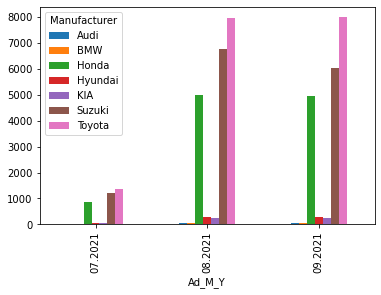

In [33]:
x.groupby(['Manufacturer']).Ad_M_Y.value_counts().unstack(0).plot.bar()

Text(0, 0.5, 'Number of Ads')

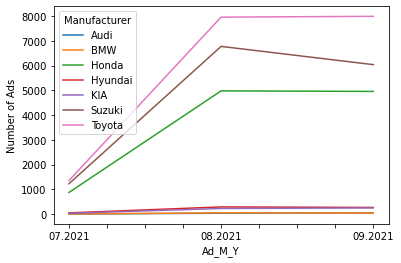

In [34]:
x.groupby(['Manufacturer']).Ad_M_Y.value_counts().unstack(0).plot()
plt.xlabel('Ad_M_Y')
plt.ylabel('Number of Ads')

The graph is so skewed by high number Honda and Toyota ads compared to other manufacturers. Let's seperate these two from the others for comparison over the 3 months from July 2021 to September 2021.

In [35]:
y = plt_1.loc[(plt_1["Manufacturer"] == 'Honda') | (plt_1["Manufacturer"] == 'Toyota') | (plt_1["Manufacturer"] == 'Suzuki')]
y

,Manufacturer,Ad_M_Y
0,Suzuki,08.2021
2,Suzuki,08.2021
4,Honda,08.2021
5,Suzuki,08.2021
6,Toyota,08.2021
...,...,...
55629,Toyota,07.2021
55650,Toyota,07.2021
55651,Toyota,07.2021
55652,Toyota,07.2021


Text(0, 0.5, 'Number of Ads')

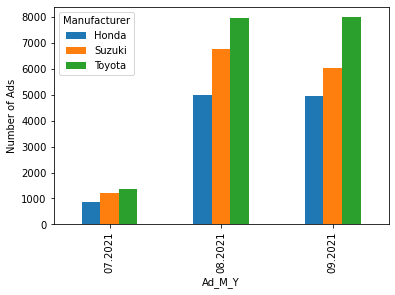

In [36]:
y.groupby(['Manufacturer']).Ad_M_Y.value_counts().unstack(0).plot.bar()
plt.xlabel('Ad_M_Y')
plt.ylabel('Number of Ads')

Text(0, 0.5, 'Number of Ads')

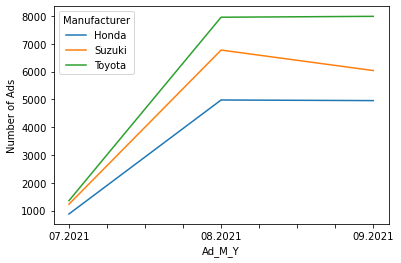

In [37]:
y.groupby(['Manufacturer']).Ad_M_Y.value_counts().unstack(0).plot()
plt.xlabel('Ad_M_Y')
plt.ylabel('Number of Ads')

We can see that from the two of the biggest competitors, Toyota takes a lead in the number of active ads in from July to September of 2021. 

In [38]:
plt_1.Ad_M_Y.dtype

dtype('O')

In [39]:
z = plt_1.loc[(plt_1["Manufacturer"] == 'KIA') | (plt_1["Manufacturer"] == 'Audi') | (plt_1["Manufacturer"] == 'BMW') | (plt_1["Manufacturer"] == 'Hyundai') | (plt_1["Manufacturer"] == 'Mercedes Benz')]
z

,Manufacturer,Ad_M_Y
51,KIA,09.2021
64,KIA,09.2021
116,Mercedes Benz,09.2021
119,Mercedes Benz,09.2021
167,KIA,09.2021
...,...,...
55551,KIA,07.2021
55587,KIA,07.2021
55602,Hyundai,07.2021
55627,Hyundai,07.2021


Text(0, 0.5, 'Number of Ads')

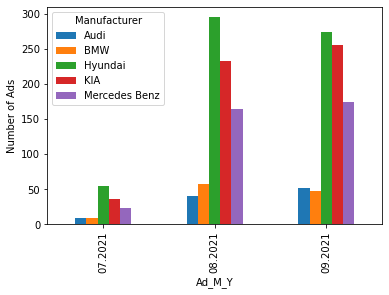

In [40]:
z.groupby(['Manufacturer']).Ad_M_Y.value_counts().unstack(0).plot.bar()
plt.xlabel('Ad_M_Y')
plt.ylabel('Number of Ads')

Text(0, 0.5, 'Number of Ads')

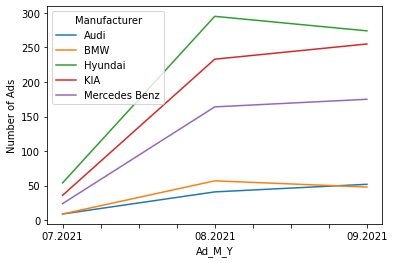

In [41]:
z.groupby(['Manufacturer']).Ad_M_Y.value_counts().unstack(0).plot()
plt.xlabel('Ad_M_Y')
plt.ylabel('Number of Ads')

Here we compare the rest of the famous manufacturers. Hyundau and KIA - the two Korean brands have a major lead in the number of active ads over the 3 months. Audi and BMW have been battling close with BMW taking the lead in August, while Audi taking the lead in September

In [43]:
plt_2 = dfts[['Ad Last Updated', 'Manufacturer']]

In [44]:
plt_2 = plt_2.loc[ (plt_2['Ad Last Updated'] >= datetime(2021, 7, 1)) & (plt_2['Ad Last Updated'] <= datetime(2021, 9, 30))]



In [45]:
plt_2['Ad_M_Y'] = plt_2['Ad Last Updated'].dt.strftime('%m.%Y')

In [46]:
plt_2 = plt_2[['Manufacturer', 'Ad_M_Y']]
plt_2

,Manufacturer,Ad_M_Y
0,Suzuki,08.2021
1,Mitsubishi,08.2021
2,Suzuki,08.2021
4,Honda,08.2021
5,Suzuki,08.2021
...,...,...
55650,Toyota,07.2021
55651,Toyota,07.2021
55652,Toyota,07.2021
55653,Hyundai,07.2021


In [47]:
plt_2.groupby(['Manufacturer']).Ad_M_Y.value_counts()

Manufacturer  Ad_M_Y 
Adam          09.2021     2
              08.2021     1
Audi          09.2021    52
              08.2021    41
              07.2021     9
                         ..
United        07.2021     5
Volkswagen    08.2021     7
              09.2021     2
              07.2021     1
Volvo         08.2021     2
Name: Ad_M_Y, Length: 115, dtype: int64

We can see that there are a few other manufacturers with high number of ads. Hence, we will modify above graphs to add a few more noteworthy manufacturers for comparison and also find the top 10 manufacturers with maximum number of ads over these 3 months

In [48]:
# plt_2.groupby(['Manufacturer']).Ad_M_Y.value_counts().sort_values(ascending= False).nlargest(12).unstack(0).plot()
# plt.legend(bbox_to_anchor=(1,0), loc="lower left", 
#                 bbox_transform=fig.transFigure, ncol=5)
# plt.xlabel('Ad_M_Y')
# plt.ylabel('Number of Ads')

Now plotting a pie chart below to represent the top 5 manufacturers in terms of ads posted (2019 onwards - which is when Hyundai was launched in Pakistan).

In [49]:
# Extracting ads after 2019
plt_p = dfts[['Ad Last Updated', 'Manufacturer']]
plt_p = plt_p.loc[ (plt_p['Ad Last Updated'] >= datetime(2019, 7, 1)) & (plt_p['Ad Last Updated'] <= datetime(2021, 9, 30))]
plt_p = plt_p[['Manufacturer']].value_counts().to_frame('count')



In [50]:
# Sorting values on manufacturers by number of ads
plt_p = plt_p.sort_values(by='count', ascending=False).reset_index()

In [51]:
# Making a df with top 5
df2 = plt_p[:5].copy()
print(df2)
# row for the others group with all other manufacturers
new_row = pd.DataFrame(data = {
    'Manufacturer' : ['others'],
    'count' : [plt_p['count'][5:].sum()]
})

print(new_row)
# Combining top 5 with others
df2 = pd.concat([df2, new_row])
print(df2)

  Manufacturer  count
0       Toyota  17315
1       Suzuki  14055
2        Honda  10821
3     Daihatsu   1819
4       Nissan    663
  Manufacturer  count
0       others   4042
  Manufacturer  count
0       Toyota  17315
1       Suzuki  14055
2        Honda  10821
3     Daihatsu   1819
4       Nissan    663
0       others   4042


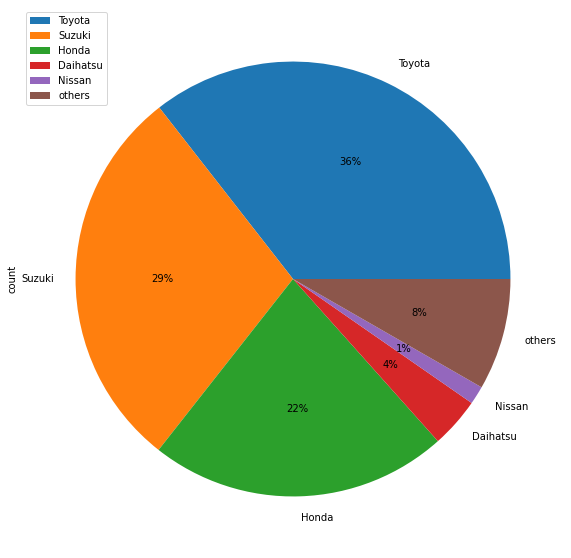

In [52]:
plot = df2.set_index('Manufacturer').plot.pie(y='count', figsize=(10,10), autopct='%1.0f%%', pctdistance=0.6, labeldistance=1.1)
# plt_p.dtypes

We can see that Toyota (36%), Suzuki (29%) and Honda (22%) combined make up a total of 87% of ads that were updated/posted 2019 onwards on Pakwheels. This shows how dominating these 3 manufacturers are compared to all the others.

<AxesSubplot:xlabel='Ad_M_Y'>

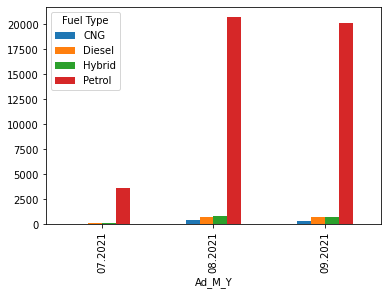

In [53]:
plt_3 = dfts[['Ad Last Updated', 'Fuel Type']]
plt_3 = plt_3.loc[ (plt_3['Ad Last Updated'] >= datetime(2021, 7, 1)) & (plt_3['Ad Last Updated'] <= datetime(2021, 9, 30))]
plt_3['Ad_M_Y'] = plt_3['Ad Last Updated'].dt.strftime('%m.%Y')
plt_3 = plt_3[['Fuel Type','Ad_M_Y']]

lpg = plt_3[ plt_3['Fuel Type']=='Lpg' ].index
plt_3.drop(lpg , inplace=True)
plt_3 = plt_3.groupby(['Fuel Type']).Ad_M_Y.value_counts().unstack(0).plot.bar()
plt_3

<AxesSubplot:xlabel='Ad_M_Y'>

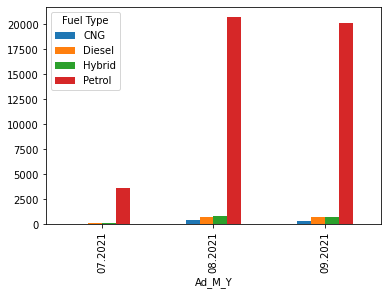

In [54]:
plt_3 = dfts[['Ad Last Updated', 'Fuel Type']]
plt_3 = plt_3.loc[ (plt_3['Ad Last Updated'] >= datetime(2021, 7, 1)) & (plt_3['Ad Last Updated'] <= datetime(2021, 9, 30))]
plt_3['Ad_M_Y'] = plt_3['Ad Last Updated'].dt.strftime('%m.%Y')
plt_3 = plt_3[['Fuel Type','Ad_M_Y']]

lpg = plt_3[ plt_3['Fuel Type']=='Lpg' ].index
plt_3.drop(lpg , inplace=True)
plt_3 = plt_3.groupby(['Fuel Type']).Ad_M_Y.value_counts().unstack(0).plot.bar()
plt_3

# Price Analysis


Heatmap to see the correlation between Sales Price and different attributes.

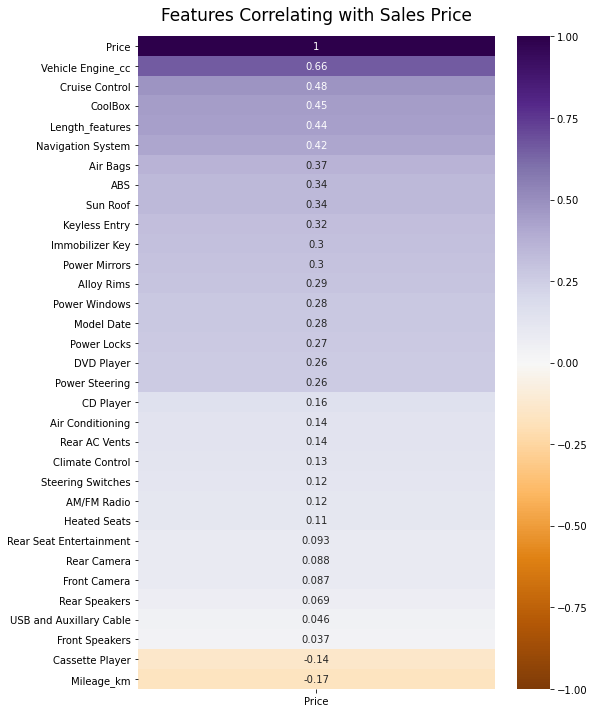

In [56]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(resultant.corr()[['Price']].sort_values(by='Price', ascending=False), vmin=-1, vmax=1, annot=True, 
                      cmap='PuOr')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':17}, pad=16);

Clearly there is correlation between Price and attributes till Power Keys. There is strong correlation between sales price and first 6 attributes.

### Visualizing Different Graphs to see how the additional Features alter the price

Removing one color column from the dataset

In [57]:
color = resultant["Color"]
color = color.iloc[:, 0]

del resultant["Color"]
resultant["Color"] = color

Using different categorical variables(attributes) to draw the boxplots to see if price is affected by such variables

Text(0.5, 1.0, 'Boxplot of Price and Cruise Control')

<Figure size 288x288 with 0 Axes>

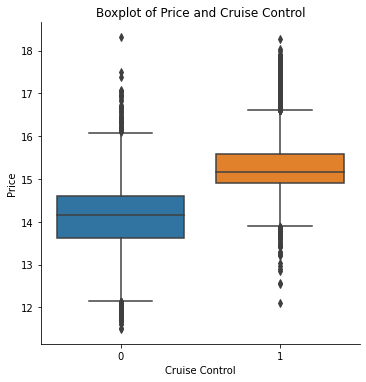

In [58]:
plt.figure(figsize=(4,4))

log_p = np.log(resultant["Price"])
sns.catplot(x = "Cruise Control",  y = log_p, kind ="box", data = resultant)

plt.title("Boxplot of Price and Cruise Control")

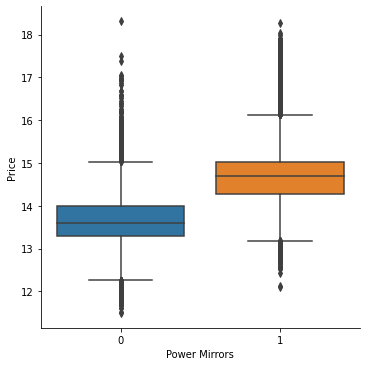

In [59]:
sns.catplot(x = "Power Mirrors",  y = log_p, kind ="box", data = resultant)

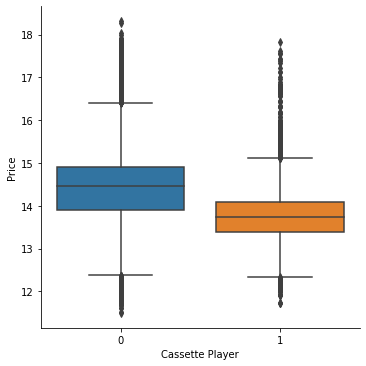

In [60]:
sns.catplot(x = "Cassette Player",  y = log_p, kind ="box", data = resultant)

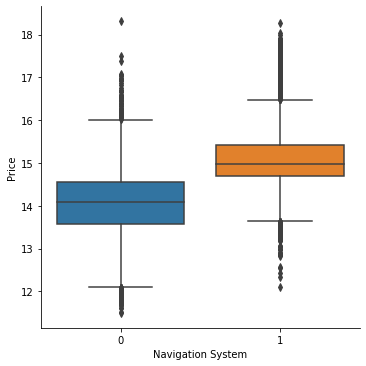

In [61]:
sns.catplot(x = "Navigation System",  y = log_p, kind ="box", data = resultant)

Since Mileage variable has several unique values, we will make it categorical based on their median value

Text(0.5, 1.0, 'Distribution of Mileage in Kms')

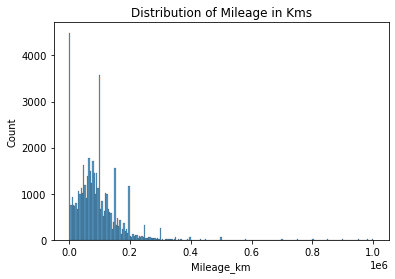

In [62]:
sns.histplot(data=resultant, x="Mileage_km")
plt.title("Distribution of Mileage in Kms")


Looking at the distribution of mileage variable to check the skewness

In [63]:
resultant["Mileage_km"].describe()

count     48715.000000
mean      92673.454665
std       87411.430846
min           1.000000
25%       42000.000000
50%       80000.000000
75%      120000.000000
max      999999.000000
Name: Mileage_km, dtype: float64

###### Since the varialbe is skewed, we need to make binary variable based on median (values >median & values < median )

In [64]:
resultant.loc[:, 'Mileage_binary'] = np.where(resultant.Mileage_km >=8000, 1, 0)
resultant["Mileage_binary"] = resultant["Mileage_binary"].replace({1:">=8000 km", 0:"< 8000 km"})



Now making graph to see the effect of mileage of price

Text(10.049999999999997, 0.5, 'Price in Logs')

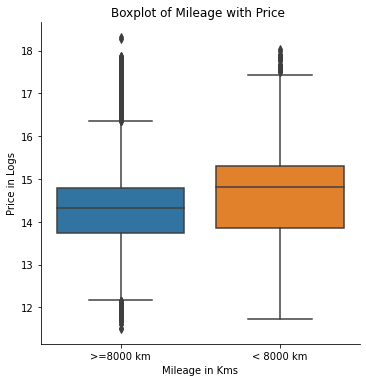

In [65]:
sns.catplot(x = "Mileage_binary",  y = log_p, kind ="box", data = resultant)
plt.title("Boxplot of Mileage with Price ")
plt.xlabel("Mileage in Kms")
plt.ylabel("Price in Logs")

Let's see how the price differs for different manufacturers in the same competitive category

In [66]:
Manufacturer_new = resultant[(resultant["Manufacturer"]=="Suzuki") | (resultant["Manufacturer"]=="Honda") 
                             | (resultant["Manufacturer"]=="Toyota") | (resultant["Manufacturer"]=="Hyundai") 
                             | (resultant["Manufacturer"]=="Mitsubishi")]

In [67]:
Body_new = resultant[(resultant["Body Type"] == "SUV") | (resultant["Body Type"] == "Sedan") 
                     | (resultant["Body Type"] == "Crossover") | (resultant["Body Type"] == "Van") 
                     | (resultant["Body Type"] == "Hatchback")]

In [68]:
Diff_Manufacturs = pd.merge(Manufacturer_new, Body_new)

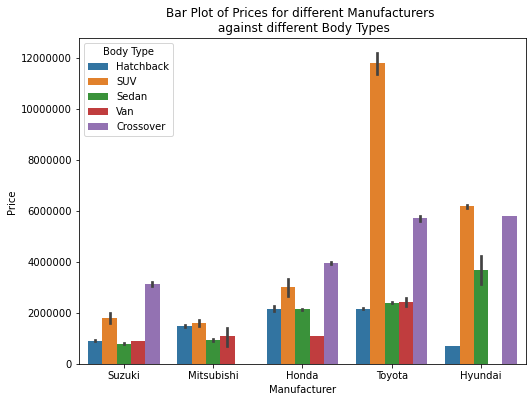

In [69]:
plt.figure(figsize=(8, 6))
sns.barplot(data = Diff_Manufacturs, y = "Price", x = "Manufacturer",hue="Body Type")
plt.title("Bar Plot of Prices for different Manufacturers \n against different Body Types")
plt.ticklabel_format(style='plain', axis='y')


Looking at the price distribution of Toyota

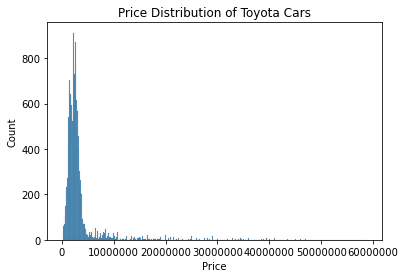

In [70]:
#Diff_Manufacturs.query("Manufacturer == 'Toyota' & Body Type == 'SUV'" )["Price"].describe()
sns.histplot(data=Diff_Manufacturs.query("Manufacturer == 'Toyota'"), x="Price")
plt.title("Price Distribution of Toyota Cars")
plt.ticklabel_format(style='plain', axis='x')



Toyota's Distribution of Prices for SUVS alone

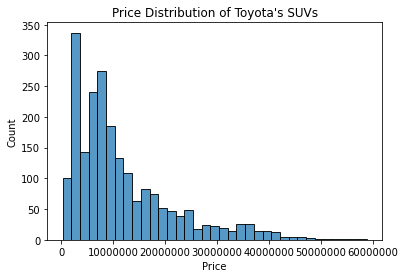

In [71]:
sns.histplot(data=Diff_Manufacturs.query("Manufacturer == 'Toyota' & `Body Type` == 'SUV'"), x="Price")
plt.title("Price Distribution of Toyota's SUVs")
plt.ticklabel_format(style='plain', axis='x')


### Does Engine Size affect the price

In [72]:
resultant["Vehicle Engine_cc"].describe()

count    48715.000000
mean      1395.391625
std        634.604797
min        600.000000
25%       1000.000000
50%       1300.000000
75%       1600.000000
max       6660.000000
Name: Vehicle Engine_cc, dtype: float64

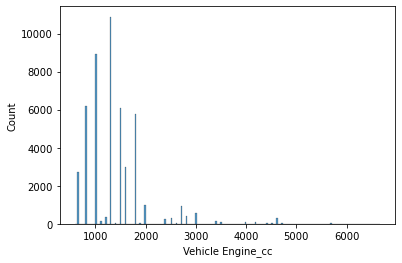

In [73]:
sns.histplot(data=resultant, x="Vehicle Engine_cc")

resultant.loc[:, 'Engine_bin'] = np.where(resultant["Vehicle Engine_cc"] >=1300, 1, 0)



Text(0.5, 1.0, 'Boxplot of Vehicle Engine Capacity \n Higher mean price of Engine > 1300cc')

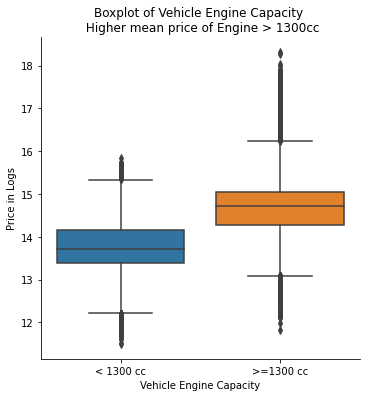

In [74]:
resultant["Engine_bin"] = resultant["Engine_bin"].replace({1:">=1300 cc", 0:"< 1300 cc"})

sns.catplot(x = "Engine_bin",  y = log_p, kind ="box", data = resultant)
plt.xlabel("Vehicle Engine Capacity")
plt.ylabel("Price in Logs")

plt.title("Boxplot of Vehicle Engine Capacity \n Higher mean price of Engine > 1300cc")

### Does Assembly of Car have any effect on the price

In [75]:
resultant.loc[:, 'Assembled_local'] = np.where(resultant.Assembled == "Local", 1, 0)


In [76]:
resultant["Assembled_local"] = resultant["Assembled_local"].replace({0:"Foreign", 1:"Local"})


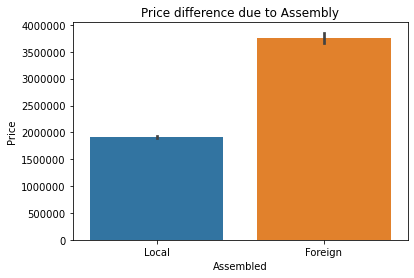

In [77]:
sns.barplot(data= resultant, y = "Price", x="Assembled_local")
plt.xlabel("Assembled")
plt.title("Price difference due to Assembly")
plt.ticklabel_format(style='plain', axis='y')



Since there is more variance in the prices, especially in the foreign assembled cars, it would be insightful to visualize the difference on body type

##### Setting a different dataframe to hold 5 different body types

In [78]:
assembled_l = resultant[(resultant["Body Type"] == "SUV") | (resultant["Body Type"] == "Sedan") 
                        | (resultant["Body Type"] == "Crossover") | (resultant["Body Type"] == "Van") 
                        | (resultant["Body Type"] == "Hatchback")]


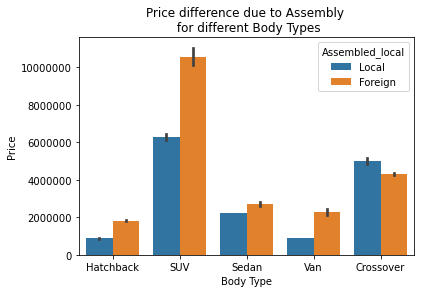

In [79]:
a = sns.barplot(data= assembled_l, y = "Price", x= "Body Type", hue = "Assembled_local")
plt.xlabel("Body Type")
plt.title("Price difference due to Assembly \n for different Body Types")
plt.ticklabel_format(style='plain', axis='y')



### Price of different Manufacturers across time, under the same body Type category

In [80]:
time_s_df = resultant.copy(deep=False)

time_s_df = resultant.query("`Ad Last Updated` >= '2021-07-01' <= '2021-09-30'")

In [81]:
time_s_df = time_s_df[(time_s_df["Body Type"] == "SUV") | (time_s_df["Body Type"] == "Sedan") 
                      | (time_s_df["Body Type"] == "Crossover") | (time_s_df["Body Type"] == "Van") 
                      | (time_s_df["Body Type"] == "Hatchback")]

In [82]:
time_s_df = time_s_df[(time_s_df["Manufacturer"]=="Suzuki") | (time_s_df["Manufacturer"]=="Honda") | (time_s_df["Manufacturer"]=="Toyota") 
                      | (time_s_df["Manufacturer"]=="Hyundai") | (time_s_df["Manufacturer"]=="Mitsubishi")]

In [83]:
time_s_df['Last_updated'] = time_s_df['Ad Last Updated'].dt.strftime('%m.%Y')
time_s_df.sort_values("Last_updated", inplace  =True)


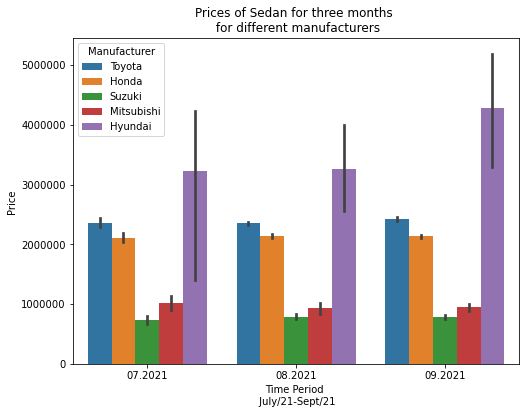

In [84]:
plt.figure(figsize=(8, 6))
sns.barplot(data=time_s_df.query("`Body Type` == 'Sedan'"), x = "Last_updated", y = "Price", hue = "Manufacturer")
plt.xlabel("Time Period \n July/21-Sept/21")
plt.title("Prices of Sedan for three months \n for different manufacturers")
plt.ticklabel_format(style='plain', axis='y')


In [85]:
time_s_df["Body Type"].unique()

array(['Sedan', 'Hatchback', 'SUV', 'Crossover', 'Van'], dtype=object)

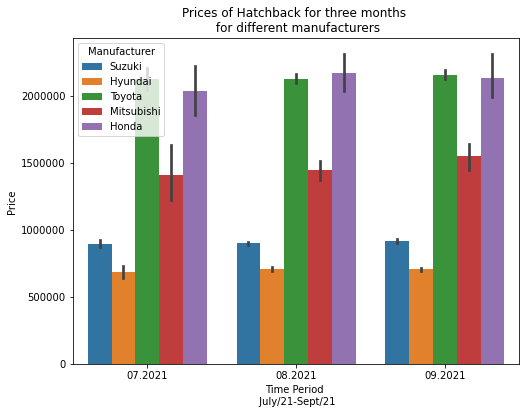

In [86]:
plt.figure(figsize=(8, 6))
sns.barplot(data=time_s_df.query("`Body Type` == 'Hatchback'"), x = "Last_updated", y = "Price", hue = "Manufacturer")
plt.xlabel("Time Period \n July/21-Sept/21")
plt.title("Prices of Hatchback for three months \n for different manufacturers")
plt.ticklabel_format(style='plain', axis='y')


## How the prices of cars have changed in last three months considering the shocks in different fuel types

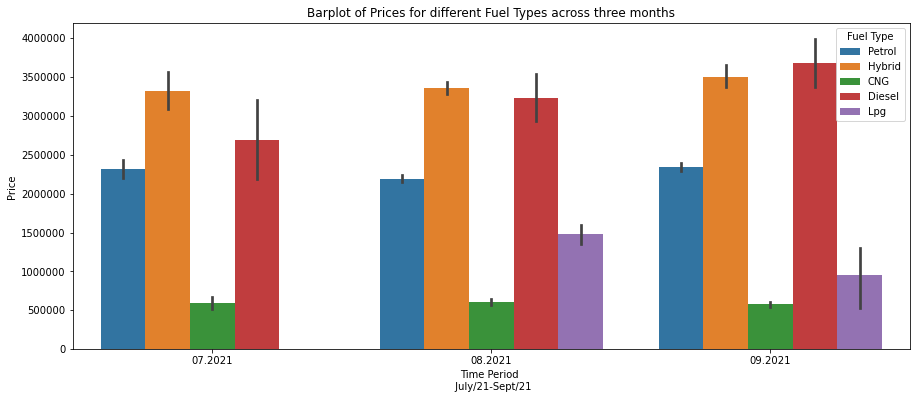

In [87]:
plt.figure(figsize=(15, 6))

a = sns.barplot(data=time_s_df, y= "Price", x = "Last_updated", hue = "Fuel Type") 
plt.xlabel("Time Period \n July/21-Sept/21")
plt.title("Barplot of Prices for different Fuel Types across three months")
plt.ticklabel_format(style='plain', axis='y')



End of Price Theme

# Location theme

In [88]:
cities=[]
cities_counter = []
for i in range(len(resultant)):
  try:
    resultant['Registered'][i]
    if (resultant['Registered'][i] not in cities):
      # print(cities_counter)
      cities.append(resultant['Registered'][i])
      cities_counter.append(1)
    else:
      # print(cities_counter)
      idx = cities.index(resultant['Registered'][i])
      cities_counter[idx] =  cities_counter[idx] + 1
  except:
    pass
print(cities)
print(cities_counter)


['Islamabad', 'Karachi', 'Lahore', 'Peshawar', 'Multan', 'Adda jahan khan', 'Punjab', 'Faisalabad', 'Abbottabad', 'Un-Registered', 'Rawalpindi', 'Swat', 'Sialkot', 'Sindh', 'Jhelum', 'Vehari', 'Gujranwala', 'Qasba gujrat', 'Chakwal', 'Bahawalpur', 'Rahim Yar Khan', 'Layyah', 'Dera ismail khan', 'Daharki', 'Shah kot', 'Hyderabad', 'Muzaffarabad', 'Raiwind', 'Chishtian', 'Gilgit', 'D.G.Khan', 'Gujrat', 'Adda shaiwala', 'Sahiwal', 'Okara', 'Bahawalnagar', 'Nawabshah', 'Mirpur A.K.', 'Other', 'Mardan', 'Toba Tek Singh', 'Mandi bahauddin', 'Gujar Khan', 'Daska', 'Sukkur', 'Rajanpur', 'Chitral', 'Nowshera', 'Bannu', 'Kohat', 'Sargodha', 'Charsadda', 'Hafizabad', 'Quetta', 'Attock', 'Wazirabad', 'Sheikhupura', 'Lodhran', 'Pind Dadan Khan', 'Haripur', 'Swabi', 'Mansehra', 'Dadu', 'Pak pattan sharif', 'Swatmingora', 'Haroonabad', 'Bhakkar', 'Mian Wali', 'Jhang', 'Khanewal', 'Badin', 'Pattoki', 'Strawn', 'Kasur', 'Jauharabad', 'Sadiqabad', 'Narowal', 'Kashmir', 'Wah cantt', 'Burewala', 'Pindi gh

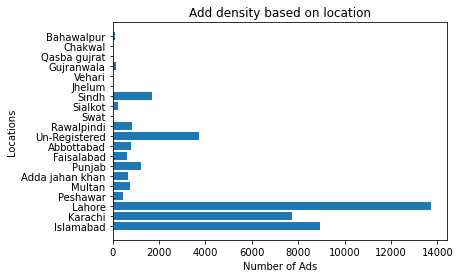

<Figure size 600x400 with 0 Axes>

In [89]:
# plt.plot(cities_counter)

plt.barh(cities[:20],cities_counter[:20])
plt.title("Add density based on location")
plt.ylabel("Locations")
plt.xlabel("Number of Ads")
plt.figure(dpi=100)
plt.show()


In [90]:
cities=[]


resultant['Vehicle Engine_cc'] = resultant['Vehicle Engine_cc'].astype(int)

cities_counter1 = []
for i in range(len(resultant)):
  try:
    resultant['Registered'][i]
    if (resultant['Registered'][i] not in cities):
      # print(cities_counter)
      cities.append(resultant['Registered'][i])
      cities_counter1.append(resultant['Vehicle Engine_cc'][i])
    else:
      # print(cities_counter)
      idx = cities.index(resultant['Registered'][i])
      cities_counter1[idx] =  cities_counter1[idx] + resultant['Vehicle Engine_cc'][i]
  except:
    pass
print(cities)
print(cities_counter1)

['Islamabad', 'Karachi', 'Lahore', 'Peshawar', 'Multan', 'Adda jahan khan', 'Punjab', 'Faisalabad', 'Abbottabad', 'Un-Registered', 'Rawalpindi', 'Swat', 'Sialkot', 'Sindh', 'Jhelum', 'Vehari', 'Gujranwala', 'Qasba gujrat', 'Chakwal', 'Bahawalpur', 'Rahim Yar Khan', 'Layyah', 'Dera ismail khan', 'Daharki', 'Shah kot', 'Hyderabad', 'Muzaffarabad', 'Raiwind', 'Chishtian', 'Gilgit', 'D.G.Khan', 'Gujrat', 'Adda shaiwala', 'Sahiwal', 'Okara', 'Bahawalnagar', 'Nawabshah', 'Mirpur A.K.', 'Other', 'Mardan', 'Toba Tek Singh', 'Mandi bahauddin', 'Gujar Khan', 'Daska', 'Sukkur', 'Rajanpur', 'Chitral', 'Nowshera', 'Bannu', 'Kohat', 'Sargodha', 'Charsadda', 'Hafizabad', 'Quetta', 'Attock', 'Wazirabad', 'Sheikhupura', 'Lodhran', 'Pind Dadan Khan', 'Haripur', 'Swabi', 'Mansehra', 'Dadu', 'Pak pattan sharif', 'Swatmingora', 'Haroonabad', 'Bhakkar', 'Mian Wali', 'Jhang', 'Khanewal', 'Badin', 'Pattoki', 'Strawn', 'Kasur', 'Jauharabad', 'Sadiqabad', 'Narowal', 'Kashmir', 'Wah cantt', 'Burewala', 'Pindi gh

[1514.0534137892503, 1400.4708311822405, 1323.5241630276564, 1445.6703296703297, 1131.2565445026178, 1389.0381679389313, 1277.2661752661752, 1237.125, 1296.272040302267, 1650.4193374629679, 1137.0794392523364, 1723.4285714285713, 1286.1739130434783, 1357.5103734439833, 1273.076923076923, 986.9565217391304, 1239.1891891891892, 1300.0, 1340.0, 1065.8823529411766, 1058.7654320987654, 1866.6666666666667, 1510.0, 660.0, 1000.0, 1325.8426966292134, 1672.7272727272727, 1600.0, 1750.0, 2214.285714285714, 1111.851851851852, 1382.4, 1000.0, 1149.642857142857, 1156.6666666666667, 1500.0, 983.3333333333334, 1331.9148936170213, 2228.8888888888887, 1381.25, 837.1428571428571, 1742.857142857143, 800.0, 1133.3333333333333, 1140.0, 1600.0, 3000.0, 1358.3333333333333, 1633.3333333333333, 1300.0, 1197.3584905660377, 1340.0, 1232.0, 2211.1111111111113, 1185.0, 900.0, 1109.090909090909, 928.5714285714286, 800.0, 1850.0, 1387.5, 1301.25, 1100.0, 940.0, 1300.0, 1650.0, 800.0, 866.6666666666666, 1437.5, 1300.

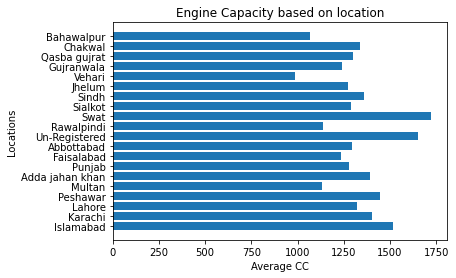

<Figure size 600x400 with 0 Axes>

In [91]:

neww = []

for i in range(len(cities_counter1)):
  # print(cities_counter1[i]/cities_counter[i])
  neww.append(cities_counter1[i]/cities_counter[i])
print(neww)
plt.barh(cities[:20],neww[:20])
plt.title("Engine Capacity based on location")
plt.ylabel("Locations")
plt.xlabel("Average CC")
plt.figure(dpi=100)
plt.show()

In [92]:
cities=[]
cities_counter1 = []
for i in range(len(resultant)):
  try:
    resultant['Registered'][i]
    if (resultant['Registered'][i]=='Lahore'):
      if (resultant['Manufacturer'][i] not in cities):
        # print(cities_counter)
        cities.append(resultant['Manufacturer'][i])
        cities_counter1.append(1)
      else:
        # print(cities_counter)
        idx = cities.index(resultant['Manufacturer'][i])
        cities_counter1[idx] =  cities_counter1[idx] + 1
  except:
    pass
print(cities)
print(cities_counter1)

['Suzuki', 'Honda', 'Toyota', 'Daihatsu', 'Daewoo', 'Mitsubishi', 'Nissan', 'KIA', 'United', 'Mazda', 'Hyundai', 'Mercedes Benz', 'FAW', 'Changan', 'Range Rover', 'Subaru', 'BMW', 'MG', 'Haval', 'Audi', 'Chevrolet', 'DFSK', 'Prince', 'Jeep', 'Datsun', 'Proton', 'Isuzu', 'Lexus', 'Chery', 'Land Rover', 'Daehan', 'Porsche', 'SsangYong', 'Master', 'Volkswagen', 'MINI']
[4255, 3469, 4506, 480, 12, 146, 146, 75, 23, 17, 207, 82, 93, 27, 7, 11, 36, 26, 3, 35, 18, 16, 17, 2, 2, 2, 5, 10, 2, 1, 1, 2, 3, 1, 1, 1]


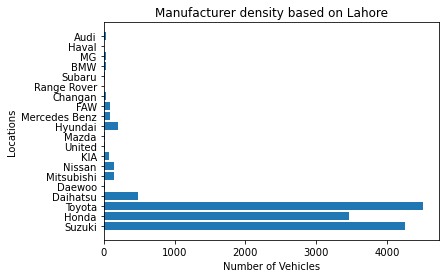

<Figure size 600x400 with 0 Axes>

In [93]:
plt.barh(cities[:20],cities_counter1[:20])
plt.title("Manufacturer density based on Lahore")
plt.ylabel("Locations")
plt.xlabel("Number of Vehicles")
plt.figure(dpi=100)
plt.show()

In [94]:
cities=[]
cities_counter1 = []
for i in range(len(resultant)):
  try:
    resultant['Registered'][i]
    if (resultant['Registered'][i]=='Karachi'):
      if (resultant['Manufacturer'][i] not in cities):
        # print(cities_counter)
        cities.append(resultant['Manufacturer'][i])
        cities_counter1.append(1)
      else:
        # print(cities_counter)
        idx = cities.index(resultant['Manufacturer'][i])
        cities_counter1[idx] =  cities_counter1[idx] + 1
  except:
    pass
print(cities)
print(cities_counter1)

['Mitsubishi', 'Daihatsu', 'Toyota', 'Suzuki', 'Honda', 'Nissan', 'KIA', 'Mercedes Benz', 'Lexus', 'Mazda', 'DFSK', 'Changan', 'Audi', 'Hyundai', 'Subaru', 'FAW', 'BMW', 'MG', 'Adam', 'Proton', 'United', 'Daehan', 'Chevrolet', 'Prince', 'Daewoo', 'Ford', 'Volkswagen', 'Porsche', 'Range Rover', 'Isuzu', 'JAC', 'Land Rover', 'SsangYong']
[85, 444, 2896, 2236, 1597, 135, 55, 75, 10, 7, 7, 21, 17, 60, 4, 19, 19, 10, 2, 8, 1, 2, 5, 4, 5, 3, 3, 3, 7, 3, 2, 1, 2]


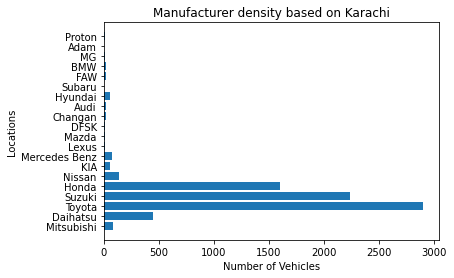

<Figure size 600x400 with 0 Axes>

In [95]:
plt.barh(cities[:20],cities_counter1[:20])
plt.title("Manufacturer density based on Karachi")
plt.ylabel("Locations")
plt.xlabel("Number of Vehicles")
plt.figure(dpi=100)
plt.show()

In [96]:
cities=[]
cities_counter1 = []
for i in range(len(resultant)):
  try:
    resultant['Registered'][i]
    if (resultant['Registered'][i]=='Layyah'):
      if (resultant['Manufacturer'][i] not in cities):
        # print(cities_counter)
        cities.append(resultant['Manufacturer'][i])
        cities_counter1.append(1)
      else:
        # print(cities_counter)
        idx = cities.index(resultant['Manufacturer'][i])
        cities_counter1[idx] =  cities_counter1[idx] + 1
  except:
    pass
print(cities)
print(cities_counter1)

['Toyota', 'Suzuki']
[2, 1]


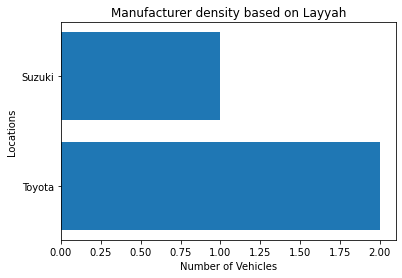

<Figure size 600x400 with 0 Axes>

In [97]:
plt.barh(cities,cities_counter1)
plt.title("Manufacturer density based on Layyah")
plt.ylabel("Locations")
plt.xlabel("Number of Vehicles")
plt.figure(dpi=100)
plt.show()

In [98]:
cities=[]
cities_counter1 = []
for i in range(len(resultant)):
  try:
    resultant['Registered'][i]
    if (resultant['Registered'][i]=='Swat'):
      if (resultant['Manufacturer'][i] not in cities):
        # print(cities_counter)
        cities.append(resultant['Manufacturer'][i])
        cities_counter1.append(1)
      else:
        # print(cities_counter)
        idx = cities.index(resultant['Manufacturer'][i])
        cities_counter1[idx] =  cities_counter1[idx] + 1
  except:
    pass
print(cities)
print(cities_counter1)

['Toyota', 'Mitsubishi', 'Honda', 'Suzuki', 'Mercedes Benz']
[16, 3, 4, 11, 1]


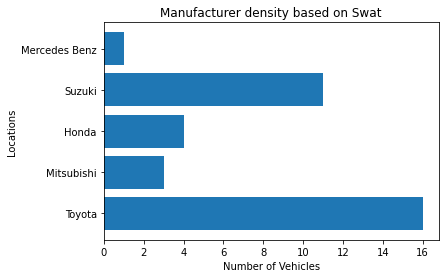

<Figure size 600x400 with 0 Axes>

In [99]:
plt.barh(cities,cities_counter1)
plt.title("Manufacturer density based on Swat")
plt.ylabel("Locations")
plt.xlabel("Number of Vehicles")
plt.figure(dpi=100)
plt.show()

In [100]:
cities=[]
cities_counter1 = []
for i in range(len(resultant)):
  try:
    resultant['Registered'][i]
    if (resultant['Registered'][i] not in cities):
      # print(cities_counter)
      cities.append(resultant['Registered'][i])
      cities_counter1.append(resultant['Price'][i])
    else:
      # print(cities_counter)
      idx = cities.index(resultant['Registered'][i])
      cities_counter1[idx] =  cities_counter1[idx] + resultant['Price'][i]
  except:
    pass
print(cities)
print(cities_counter1)

['Islamabad', 'Karachi', 'Lahore', 'Peshawar', 'Multan', 'Adda jahan khan', 'Punjab', 'Faisalabad', 'Abbottabad', 'Un-Registered', 'Rawalpindi', 'Swat', 'Sialkot', 'Sindh', 'Jhelum', 'Vehari', 'Gujranwala', 'Qasba gujrat', 'Chakwal', 'Bahawalpur', 'Rahim Yar Khan', 'Layyah', 'Dera ismail khan', 'Daharki', 'Shah kot', 'Hyderabad', 'Muzaffarabad', 'Raiwind', 'Chishtian', 'Gilgit', 'D.G.Khan', 'Gujrat', 'Adda shaiwala', 'Sahiwal', 'Okara', 'Bahawalnagar', 'Nawabshah', 'Mirpur A.K.', 'Other', 'Mardan', 'Toba Tek Singh', 'Mandi bahauddin', 'Gujar Khan', 'Daska', 'Sukkur', 'Rajanpur', 'Chitral', 'Nowshera', 'Bannu', 'Kohat', 'Sargodha', 'Charsadda', 'Hafizabad', 'Quetta', 'Attock', 'Wazirabad', 'Sheikhupura', 'Lodhran', 'Pind Dadan Khan', 'Haripur', 'Swabi', 'Mansehra', 'Dadu', 'Pak pattan sharif', 'Swatmingora', 'Haroonabad', 'Bhakkar', 'Mian Wali', 'Jhang', 'Khanewal', 'Badin', 'Pattoki', 'Strawn', 'Kasur', 'Jauharabad', 'Sadiqabad', 'Narowal', 'Kashmir', 'Wah cantt', 'Burewala', 'Pindi gh

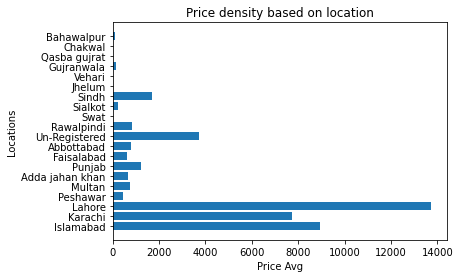

<Figure size 600x400 with 0 Axes>

In [101]:
plt.barh(cities[:20],cities_counter[:20])
plt.title("Price density based on location")
plt.ylabel("Locations")
plt.xlabel("Price Avg")
plt.figure(dpi=100)
plt.show()

End of Project Notebook

# Machine Learning

In [102]:
resultant

,Type,Model,Condition,Model Date,Manufacturer,Fuel Type,Vehicle Transmission,Body Type,Mileage_km,Ad Last Updated,Price,Price Currency,Vehicle Engine_cc,Registered,Assembled,Length_features,AM/FM Radio,Alloy Rims,Cassette Player,Immobilizer Key,Air Bags,Air Conditioning,Keyless Entry,Power Locks,Power Mirrors,Power Steering,Power Windows,Sun Roof,CD Player,ABS,Cruise Control,DVD Player,Navigation System,Front Speakers,Rear Camera,Rear Speakers,CoolBox,Climate Control,Steering Switches,USB and Auxillary Cable,Rear AC Vents,Front Camera,Heated Seats,Rear Seat Entertainment,Color,Mileage_binary,Engine_bin,Assembled_local
0,Car,Mehran,used,2013,Suzuki,Petrol,Manual,Hatchback,42000,2021-08-27,790000,PKR,800,Islamabad,Local,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,White,>=8000 km,< 1300 cc,Local
1,Car,Pajero,used,1992,Mitsubishi,Petrol,Automatic,SUV,82400,2021-08-27,2000000,PKR,3500,Karachi,Imported,11,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Silver,>=8000 km,>=1300 cc,Foreign
2,Car,Cultus,used,2016,Suzuki,Petrol,Manual,Hatchback,123456,2021-08-27,1265000,PKR,1000,Lahore,Local,4,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Grey,>=8000 km,< 1300 cc,Local
4,Car,City,used,2013,Honda,Petrol,Manual,Sedan,11,2021-08-27,2075000,PKR,1500,Lahore,Local,13,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,Grey,< 8000 km,>=1300 cc,Local
5,Car,Cultus,used,2016,Suzuki,Petrol,Manual,Hatchback,123456,2021-08-27,1295000,PKR,1000,Lahore,Local,4,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Grey,>=8000 km,< 1300 cc,Local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55669,Car,Bolan,used,2016,Suzuki,Petrol,Manual,Van,59500,2020-10-10,890000,PKR,800,Lahore,Local,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,White,>=8000 km,< 1300 cc,Local
55670,Car,Prius,used,2010,Toyota,Petrol,Automatic,Sedan,199000,2020-10-10,2700000,PKR,1800,Un-Registered,Imported,14,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,White,>=8000 km,>=1300 cc,Foreign
55671,Car,Sportage,used,2020,KIA,Petrol,Automatic,SUV,180,2020-08-22,5900000,PKR,2000,Un-Registered,Local,14,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,Black,< 8000 km,>=1300 cc,Local
55672,Car,Vezel,used,2014,Honda,Petrol,Automatic,Crossover,62500,2020-08-08,3250000,PKR,1500,Karachi,Imported,15,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,Silver,>=8000 km,>=1300 cc,Foreign


## Preparing Data

In [103]:
#Copy of the DF
a = resultant.copy()

In [104]:
#Keeping data for 5 Manufacturers
a  = resultant[resultant["Manufacturer"].isin(['Suzuki','Honda','Hyundai','Mitsubishi','Toyota'])]

#Manufacturer Dummy df
manu_dummies = pd.get_dummies(a["Manufacturer"])

##Concating the dummy df with the original df

a = pd.concat([a, manu_dummies], axis = 1)


In [105]:
#Fuel Dummies
fuel_dummies  = pd.get_dummies(a["Fuel Type"])

#Concat

a  = pd.concat([a, fuel_dummies],axis = 1)


In [106]:
a

,Type,Model,Condition,Model Date,Manufacturer,Fuel Type,Vehicle Transmission,Body Type,Mileage_km,Ad Last Updated,Price,Price Currency,Vehicle Engine_cc,Registered,Assembled,Length_features,AM/FM Radio,Alloy Rims,Cassette Player,Immobilizer Key,Air Bags,Air Conditioning,Keyless Entry,Power Locks,Power Mirrors,Power Steering,Power Windows,Sun Roof,CD Player,ABS,Cruise Control,DVD Player,Navigation System,Front Speakers,Rear Camera,Rear Speakers,CoolBox,Climate Control,Steering Switches,USB and Auxillary Cable,Rear AC Vents,Front Camera,Heated Seats,Rear Seat Entertainment,Color,Mileage_binary,Engine_bin,Assembled_local,Honda,Hyundai,Mitsubishi,Suzuki,Toyota,CNG,Diesel,Hybrid,Lpg,Petrol
0,Car,Mehran,used,2013,Suzuki,Petrol,Manual,Hatchback,42000,2021-08-27,790000,PKR,800,Islamabad,Local,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,White,>=8000 km,< 1300 cc,Local,0,0,0,1,0,0,0,0,0,1
1,Car,Pajero,used,1992,Mitsubishi,Petrol,Automatic,SUV,82400,2021-08-27,2000000,PKR,3500,Karachi,Imported,11,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Silver,>=8000 km,>=1300 cc,Foreign,0,0,1,0,0,0,0,0,0,1
2,Car,Cultus,used,2016,Suzuki,Petrol,Manual,Hatchback,123456,2021-08-27,1265000,PKR,1000,Lahore,Local,4,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Grey,>=8000 km,< 1300 cc,Local,0,0,0,1,0,0,0,0,0,1
4,Car,City,used,2013,Honda,Petrol,Manual,Sedan,11,2021-08-27,2075000,PKR,1500,Lahore,Local,13,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,Grey,< 8000 km,>=1300 cc,Local,1,0,0,0,0,0,0,0,0,1
5,Car,Cultus,used,2016,Suzuki,Petrol,Manual,Hatchback,123456,2021-08-27,1295000,PKR,1000,Lahore,Local,4,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Grey,>=8000 km,< 1300 cc,Local,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55668,Car,Corolla,used,2017,Toyota,Petrol,Manual,Sedan,52840,2020-10-10,2660000,PKR,1300,Islamabad,Local,12,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Black,>=8000 km,>=1300 cc,Local,0,0,0,0,1,0,0,0,0,1
55669,Car,Bolan,used,2016,Suzuki,Petrol,Manual,Van,59500,2020-10-10,890000,PKR,800,Lahore,Local,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,White,>=8000 km,< 1300 cc,Local,0,0,0,1,0,0,0,0,0,1
55670,Car,Prius,used,2010,Toyota,Petrol,Automatic,Sedan,199000,2020-10-10,2700000,PKR,1800,Un-Registered,Imported,14,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,White,>=8000 km,>=1300 cc,Foreign,0,0,0,0,1,0,0,0,0,1
55672,Car,Vezel,used,2014,Honda,Petrol,Automatic,Crossover,62500,2020-08-08,3250000,PKR,1500,Karachi,Imported,15,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,Silver,>=8000 km,>=1300 cc,Foreign,1,0,0,0,0,0,0,0,0,1


In [107]:
#Choosing top 5 Colors
b  = resultant[resultant["Color"].isin(['White','Silver','Black','Grey','Blue'])]

#Dummies
color_dummies = pd.get_dummies(b["Color"])

#Concat
a  = pd.concat([a, color_dummies],axis = 1)





In [108]:
a

,Type,Model,Condition,Model Date,Manufacturer,Fuel Type,Vehicle Transmission,Body Type,Mileage_km,Ad Last Updated,Price,Price Currency,Vehicle Engine_cc,Registered,Assembled,Length_features,AM/FM Radio,Alloy Rims,Cassette Player,Immobilizer Key,Air Bags,Air Conditioning,Keyless Entry,Power Locks,Power Mirrors,Power Steering,Power Windows,Sun Roof,CD Player,ABS,Cruise Control,DVD Player,Navigation System,Front Speakers,Rear Camera,Rear Speakers,CoolBox,Climate Control,Steering Switches,USB and Auxillary Cable,Rear AC Vents,Front Camera,Heated Seats,Rear Seat Entertainment,Color,Mileage_binary,Engine_bin,Assembled_local,Honda,Hyundai,Mitsubishi,Suzuki,Toyota,CNG,Diesel,Hybrid,Lpg,Petrol,Black,Blue,Grey,Silver,White
0,Car,Mehran,used,2013.0,Suzuki,Petrol,Manual,Hatchback,42000.0,2021-08-27,790000.0,PKR,800.0,Islamabad,Local,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,White,>=8000 km,< 1300 cc,Local,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Car,Pajero,used,1992.0,Mitsubishi,Petrol,Automatic,SUV,82400.0,2021-08-27,2000000.0,PKR,3500.0,Karachi,Imported,11.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Silver,>=8000 km,>=1300 cc,Foreign,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Car,Cultus,used,2016.0,Suzuki,Petrol,Manual,Hatchback,123456.0,2021-08-27,1265000.0,PKR,1000.0,Lahore,Local,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Grey,>=8000 km,< 1300 cc,Local,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Car,City,used,2013.0,Honda,Petrol,Manual,Sedan,11.0,2021-08-27,2075000.0,PKR,1500.0,Lahore,Local,13.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Grey,< 8000 km,>=1300 cc,Local,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,Car,Cultus,used,2016.0,Suzuki,Petrol,Manual,Hatchback,123456.0,2021-08-27,1295000.0,PKR,1000.0,Lahore,Local,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Grey,>=8000 km,< 1300 cc,Local,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55669,Car,Bolan,used,2016.0,Suzuki,Petrol,Manual,Van,59500.0,2020-10-10,890000.0,PKR,800.0,Lahore,Local,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,White,>=8000 km,< 1300 cc,Local,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
55670,Car,Prius,used,2010.0,Toyota,Petrol,Automatic,Sedan,199000.0,2020-10-10,2700000.0,PKR,1800.0,Un-Registered,Imported,14.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,White,>=8000 km,>=1300 cc,Foreign,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
55671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0
55672,Car,Vezel,used,2014.0,Honda,Petrol,Automatic,Crossover,62500.0,2020-08-08,3250000.0,PKR,1500.0,Karachi,Imported,15.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Silver,>=8000 km,>=1300 cc,Foreign,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [109]:
#Categorizing Assembled

#Dummies
Assembled_dumm = pd.get_dummies(a["Assembled"])

#Concat
a  = pd.concat([a, Assembled_dumm],axis = 1)




In [110]:
#Choosing 5 top Body Types
b  = resultant[resultant["Body Type"].isin(['Hatchback','SUV','Sedan','Van','Crossover'])]

#Dummies
BodyType_dumm = pd.get_dummies(b["Body Type"])

#Concat
a  = pd.concat([a, BodyType_dumm],axis = 1)




In [111]:
#Choosing 5 top registration locations

b  = resultant[resultant["Registered"].isin(['Lahore','Islamabad','Karachi','Punjab','Sindh','Un-Registered'])]

#Dummies
Regis_dumm = pd.get_dummies(b["Registered"])

#Concat
a  = pd.concat([a, Regis_dumm],axis = 1)


In [112]:
#Dropping rows with NA values
a =  a.dropna()

In [113]:
#Dropping columns 
a.drop(['Type','Model','Condition','Model Date','Manufacturer','Fuel Type','Vehicle Transmission','Body Type','Ad Last Updated','Price Currency','Registered','Assembled','Length_features','Color','Mileage_binary','Engine_bin','Assembled_local'], axis = 1,inplace = True)


In [114]:
a

,Mileage_km,Price,Vehicle Engine_cc,AM/FM Radio,Alloy Rims,Cassette Player,Immobilizer Key,Air Bags,Air Conditioning,Keyless Entry,Power Locks,Power Mirrors,Power Steering,Power Windows,Sun Roof,CD Player,ABS,Cruise Control,DVD Player,Navigation System,Front Speakers,Rear Camera,Rear Speakers,CoolBox,Climate Control,Steering Switches,USB and Auxillary Cable,Rear AC Vents,Front Camera,Heated Seats,Rear Seat Entertainment,Honda,Hyundai,Mitsubishi,Suzuki,Toyota,CNG,Diesel,Hybrid,Lpg,Petrol,Black,Blue,Grey,Silver,White,Imported,Local,Crossover,Hatchback,SUV,Sedan,Van,Islamabad,Karachi,Lahore,Punjab,Sindh,Un-Registered
0,42000.0,790000.0,800.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,82400.0,2000000.0,3500.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,123456.0,1265000.0,1000.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,11.0,2075000.0,1500.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,123456.0,1295000.0,1000.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55667,111000.0,750000.0,1000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
55668,52840.0,2660000.0,1300.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55669,59500.0,890000.0,800.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
55670,199000.0,2700000.0,1800.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Outlier Removal

{'whiskers': [<matplotlib.lines.Line2D at 0x27332f4e130>,
 'caps': [<matplotlib.lines.Line2D at 0x2732d497040>,
 'boxes': [<matplotlib.lines.Line2D at 0x27332f4eb20>,
 'medians': [<matplotlib.lines.Line2D at 0x2732d497730>,
 'fliers': [<matplotlib.lines.Line2D at 0x2732ea86df0>,
 'means': []}

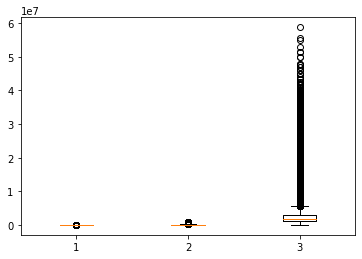

In [115]:
X1 = a[["Vehicle Engine_cc","Mileage_km", "Price"]]

plt.boxplot(X1)

In [116]:
#Using the IQR and the limits of whiskers
#For Price



Q25_price = X1["Price"].quantile(0.25)
Q75_price = X1["Price"].quantile(0.75)
IQR_price = Q75_price-Q25_price

X1 = X1[~((X1["Price"] <( Q25_price-1.5*IQR_price)) | (X1["Price"] > (Q75_price+1.5*IQR_price)))]


In [117]:
Q25_vehicle = X1["Vehicle Engine_cc"].quantile(0.25)
Q75_vehicle = X1["Vehicle Engine_cc"].quantile(0.75)
IQR_vehicle = Q75_vehicle-Q25_vehicle

X1 = X1[~((X1["Vehicle Engine_cc"] <( Q25_vehicle-1.5*IQR_vehicle)) | (X1["Vehicle Engine_cc"] > (Q75_vehicle+1.5*IQR_vehicle)))]


In [118]:
Q25_Mil = X1["Mileage_km"].quantile(0.25)
Q75_Mil = X1["Mileage_km"].quantile(0.75)
IQR_Mil = Q75_Mil-Q25_Mil

X1 = X1[~((X1["Mileage_km"] <( Q25_Mil-1.5*IQR_Mil)) | (X1["Mileage_km"] > (Q75_Mil+1.5*IQR_Mil)))]


In [119]:
a.drop(["Vehicle Engine_cc","Mileage_km", "Price"], axis =1, inplace = True)


In [120]:
a = a.dropna()

In [121]:
#Different df to scale (Not scaling the categorical variables, only scaling numeric vars)
# X1 = a[["Vehicle Engine_cc","Mileage_km", "Price"]]

#Scaling
from sklearn.preprocessing import MinMaxScaler

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X1)
# scaler.mean_
# X1= scaler.transform(X1)
# X1 = pd.DataFrame(X1)


scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)
X1 = pd.DataFrame(X1)


In [122]:
#Labeling the 0 and 1 as Vehicle engine and mileage

X1.rename(columns={0:'Vehicle Engine_cc',1:'Mileage_km',2: "Price"}, inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2732ef71f10>,
 'caps': [<matplotlib.lines.Line2D at 0x27332fd8100>,
 'boxes': [<matplotlib.lines.Line2D at 0x2732ef71ac0>,
 'medians': [<matplotlib.lines.Line2D at 0x27332fd8850>,
 'fliers': [<matplotlib.lines.Line2D at 0x27332fd8e50>,
 'means': []}

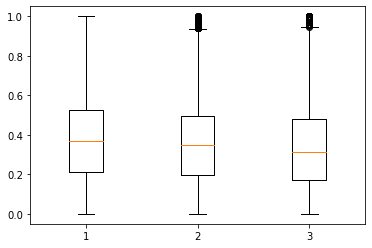

In [123]:
plt.boxplot(X1)

In [124]:
#Not scaling the categorical features

# scaling the features
# from sklearn.preprocessing import scale
# # storing column names in cols, since column names are (annoyingly) lost after 
# # scaling (the df is converted to a numpy array)
# # cols = X.columns
# cols = a.columns
# a = pd.DataFrame(scale(a))
# a.columns = cols





In [125]:
a = pd.concat([a,X1],axis = 1)

In [126]:
a = a.dropna()

## Cross Validation

Building Model using 2 variables (Mileage and Engine size)

In [127]:
X = a.iloc[:,56:58]
Y = a["Price"]
Y

0        0.128101
1        0.216031
2        0.365976
4        0.444650
5        0.276194
           ...   
27135    0.555720
27137    0.463162
27138    0.120696
27140    0.146612
27141    0.481673
Name: Price, Length: 14536, dtype: float64

In [128]:
a

,AM/FM Radio,Alloy Rims,Cassette Player,Immobilizer Key,Air Bags,Air Conditioning,Keyless Entry,Power Locks,Power Mirrors,Power Steering,Power Windows,Sun Roof,CD Player,ABS,Cruise Control,DVD Player,Navigation System,Front Speakers,Rear Camera,Rear Speakers,CoolBox,Climate Control,Steering Switches,USB and Auxillary Cable,Rear AC Vents,Front Camera,Heated Seats,Rear Seat Entertainment,Honda,Hyundai,Mitsubishi,Suzuki,Toyota,CNG,Diesel,Hybrid,Lpg,Petrol,Black,Blue,Grey,Silver,White,Imported,Local,Crossover,Hatchback,SUV,Sedan,Van,Islamabad,Karachi,Lahore,Punjab,Sindh,Un-Registered,Vehicle Engine_cc,Mileage_km,Price
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.105263,0.183403,0.128101
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.210526,0.539107,0.216031
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.473684,0.000044,0.365976
4,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.368421,0.475980,0.444650
5,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.368421,0.567684,0.276194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27135,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.368421,0.218337,0.555720
27137,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.210526,0.131001,0.463162
27138,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.210526,0.484714,0.120696
27140,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.105263,0.259822,0.146612


### Model Initialization 

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [151]:
reg_model = LinearRegression()

In [152]:
## Modeling Fitting
reg_model.fit(X_train,y_train)


LinearRegression()

In [154]:
coeff_df = pd.DataFrame(reg_model.coef_, X.columns, columns=['Coefficient'])


In [155]:
coeff_df

,Coefficient
Alloy Rims,4.740245e-03
Cassette Player,1.319459e-03
Immobilizer Key,-1.614252e-03
Air Bags,-3.171929e-03
Air Conditioning,5.948462e-04
Keyless Entry,9.019710e-04
Power Locks,-4.838233e-03
Power Mirrors,5.129478e-03
Power Steering,1.905433e-03
Power Windows,-6.342423e-03


In [156]:
y_pred = reg_model.predict(X_test)

In [157]:
Predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Predicted_df


,Actual,Predicted
11318,0.518697,0.321121
4048,0.092929,0.143265
9755,0.020733,0.284966
18749,0.537208,0.405029
18181,0.272492,0.265160
...,...,...
26016,0.463162,0.390930
11195,0.481673,0.434525
240,0.161422,0.249023
2623,0.417253,0.365707


In [158]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.10966637256131519
Mean Squared Error: 0.01986736809177715
Root Mean Squared Error: 0.1409516516106752


In [159]:
# ssr = np.sum((y_pred - y_test)**2)

# #  total sum of squares
# sst = np.sum((y_test - np.mean(y_test))**2)

# # R2 score
# r2_score = 1 - (ssr/sst)

r2 = metrics.r2_score(y_test, y_pred)
print(r2)


0.499436093486916


In [160]:
r2_score

0.499436093486916

Building Model using all variables (Numeric + Categorical)

In [161]:
 X = a.iloc[:,[1:8,]]
Y = a["Price"]
X

,Alloy Rims,Cassette Player,Immobilizer Key,Air Bags,Air Conditioning,Keyless Entry,Power Locks,Power Mirrors,Power Steering,Power Windows,Sun Roof,CD Player,ABS,Cruise Control,DVD Player,Navigation System,Front Speakers,Rear Camera,Rear Speakers,CoolBox,Climate Control,Steering Switches,USB and Auxillary Cable,Rear AC Vents,Front Camera,Heated Seats,Rear Seat Entertainment,Honda,Hyundai,Mitsubishi,Suzuki,Toyota,CNG,Diesel,Hybrid,Lpg,Petrol,Black,Blue,Grey,Silver,White,Imported,Local,Crossover,Hatchback,SUV,Sedan,Van,Islamabad,Karachi,Lahore,Punjab,Sindh,Un-Registered,Vehicle Engine_cc,Mileage_km
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.105263,0.183403
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.210526,0.539107
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.473684,0.000044
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.368421,0.475980
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.368421,0.567684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27135,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.368421,0.218337
27137,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.210526,0.131001
27138,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.210526,0.484714
27140,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.105263,0.259822


#### Model Initialization 

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [163]:
reg_model = LinearRegression()

In [164]:
## Modeling Fitting
reg_model.fit(X_train,y_train)


LinearRegression()

In [165]:
coeff_df = pd.DataFrame(reg_model.coef_, X.columns, columns=['Coefficient'])


In [166]:
coeff_df

,Coefficient
Alloy Rims,4.740245e-03
Cassette Player,1.319459e-03
Immobilizer Key,-1.614252e-03
Air Bags,-3.171929e-03
Air Conditioning,5.948462e-04
Keyless Entry,9.019710e-04
Power Locks,-4.838233e-03
Power Mirrors,5.129478e-03
Power Steering,1.905433e-03
Power Windows,-6.342423e-03


In [145]:
y_pred = reg_model.predict(X_test)

In [146]:
Predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Predicted_df


,Actual,Predicted
11318,0.518697,0.321121
4048,0.092929,0.143265
9755,0.020733,0.284966
18749,0.537208,0.405029
18181,0.272492,0.265160
...,...,...
26016,0.463162,0.390930
11195,0.481673,0.434525
240,0.161422,0.249023
2623,0.417253,0.365707


In [147]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.10966637256131519
Mean Squared Error: 0.01986736809177715
Root Mean Squared Error: 0.1409516516106752
